<a href="https://colab.research.google.com/github/bayugilangpamungkas/PCVK_Ganjil_2021/blob/main/Modul_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from google.colab.patches import cv2_imshow

Masukkan nilai Gamma: 3


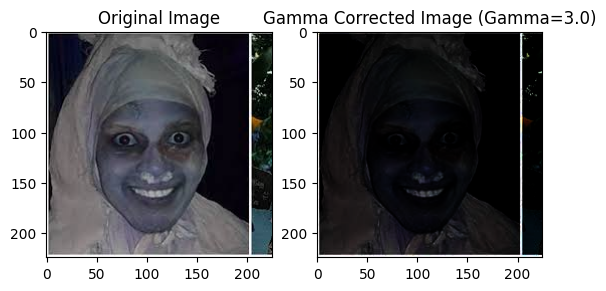

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('/content/drive/MyDrive/PCVK_4K/pocong.jpeg')
gamma = float(input('Masukkan nilai Gamma: '))

gamma_corrected = np.array(255 * (image / 255) ** gamma, dtype='uint8')

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.title(f'Gamma Corrected Image (Gamma={gamma})')
plt.imshow(gamma_corrected, cmap='gray')

plt.show()


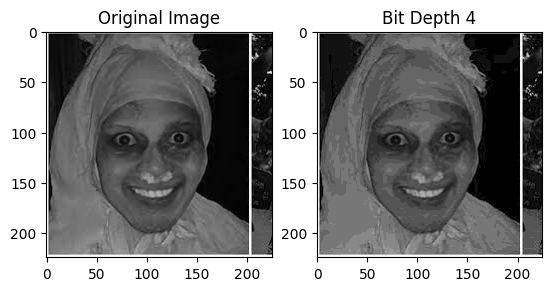

In [ ]:
bit_depth = 4  # Contoh bit depth
level = 255 / (2**bit_depth - 1)

original = cv2.imread('/content/drive/MyDrive/PCVK_4K/pocong.jpeg', cv2.IMREAD_GRAYSCALE)

depth_image = np.round(original / level) * level
depth_image = depth_image.astype(np.uint8)

# Menampilkan citra
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(original, cmap='gray')

plt.subplot(1, 2, 2)
plt.title(f'Bit Depth {bit_depth}')
plt.imshow(depth_image, cmap='gray')

plt.show()


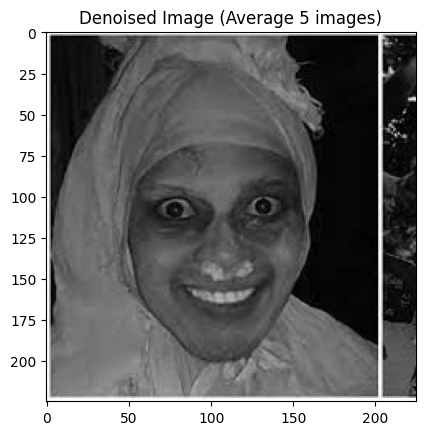

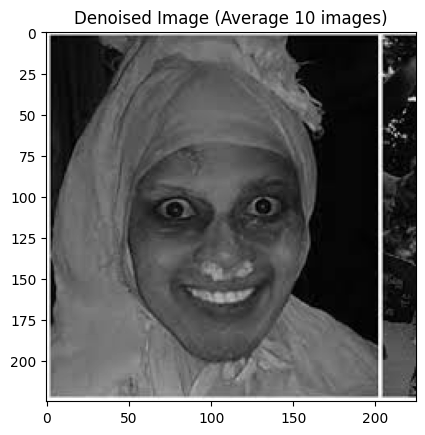

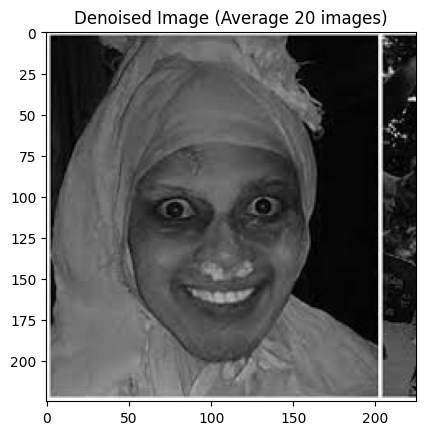

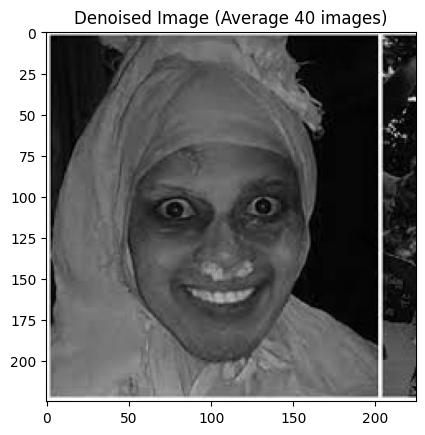

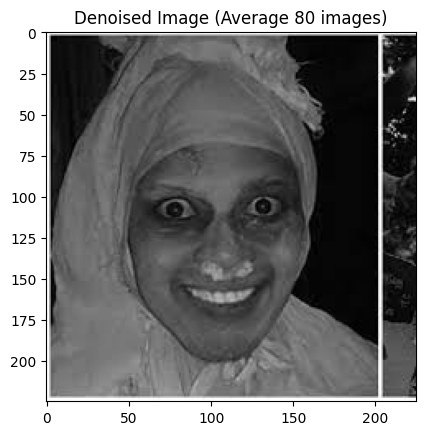

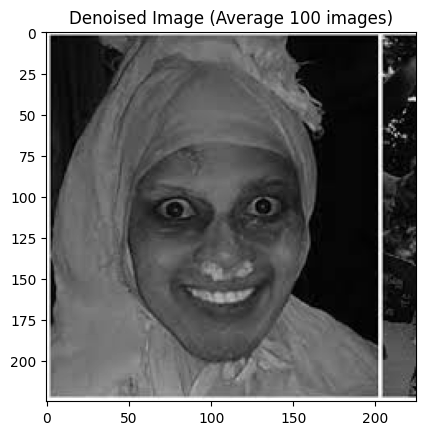

Jumlah citra yang di-average: 5 - Nilai PSNR: 100.00 dB
Jumlah citra yang di-average: 10 - Nilai PSNR: 100.00 dB
Jumlah citra yang di-average: 20 - Nilai PSNR: 100.00 dB
Jumlah citra yang di-average: 40 - Nilai PSNR: 100.00 dB
Jumlah citra yang di-average: 80 - Nilai PSNR: 100.00 dB
Jumlah citra yang di-average: 100 - Nilai PSNR: 100.00 dB


In [ ]:
import cv2
import numpy as np
import glob
from math import log10, sqrt
import matplotlib.pyplot as plt

# Fungsi untuk menghitung PSNR
def calculate_psnr(original, denoised):
    mse = np.mean((original - denoised) ** 2)
    if mse == 0:  # Jika tidak ada noise, PSNR tidak bisa dihitung
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

original = cv2.imread('/content/drive/MyDrive/PCVK_4K/pocong.jpeg', cv2.IMREAD_GRAYSCALE)
noisy_images = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file in glob.glob('/content/drive/MyDrive/PCVK_4K/pocong.jpeg')]

# List jumlah citra yang akan di-average
num_images_list = [5, 10, 20, 40, 80, 100]
psnr_values = []

# Loop untuk menghitung average denoising dan PSNR
for num_images in num_images_list:
    # Averaging denoising
    avg_image = np.mean(noisy_images[:num_images], axis=0).astype(np.uint8)

    # Hitung PSNR antara citra asli dan citra yang telah didenoise
    psnr = calculate_psnr(original, avg_image)
    psnr_values.append(psnr)

    # Menampilkan hasil denoising untuk jumlah citra yang berbeda
    plt.imshow(avg_image, cmap='gray')
    plt.title(f'Denoised Image (Average {num_images} images)')
    plt.show()

# Menampilkan hasil PSNR
for i, num_images in enumerate(num_images_list):
    print(f"Jumlah citra yang di-average: {num_images} - Nilai PSNR: {psnr_values[i]:.2f} dB")


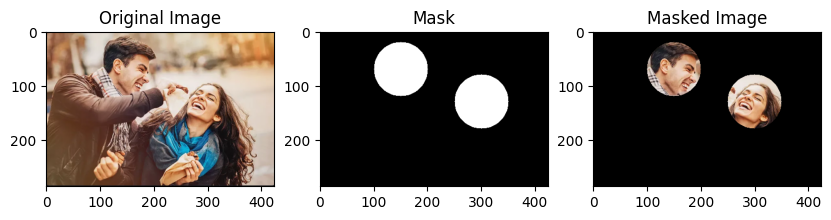

In [2]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca citra asli
image = cv2.imread('/content/drive/MyDrive/PCVK_4K/couple.png')

# Mengubah ke RGB (karena OpenCV membaca dalam format BGR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Membuat mask berbentuk lingkaran untuk objek pertama
mask1 = np.zeros(image_rgb.shape[:2], dtype="uint8")
cv2.circle(mask1, (150, 70), 50, 255, -1)  # Circle di sekitar objek pertama (posisi dan ukuran bisa disesuaikan)

# Membuat mask berbentuk lingkaran untuk objek kedua
mask2 = np.zeros(image_rgb.shape[:2], dtype="uint8")
cv2.circle(mask2, (300, 130), 50, 255, -1)  # Circle di sekitar objek kedua

# Menggabungkan kedua mask
combined_mask = cv2.bitwise_or(mask1, mask2)

# Menerapkan mask pada citra
masked_image = cv2.bitwise_and(image_rgb, image_rgb, mask=combined_mask)

# Menampilkan hasil
plt.figure(figsize=(10, 5))

# Menampilkan citra asli
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original Image')

# Menampilkan mask yang dibuat
plt.subplot(1, 3, 2)
plt.imshow(combined_mask, cmap='gray')
plt.title('Mask')

# Menampilkan hasil masking (hanya objek di dalam lingkaran yang terlihat)
plt.subplot(1, 3, 3)
plt.imshow(masked_image)
plt.title('Masked Image')

plt.show()


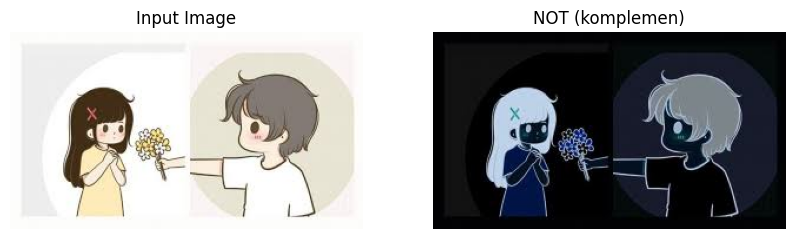

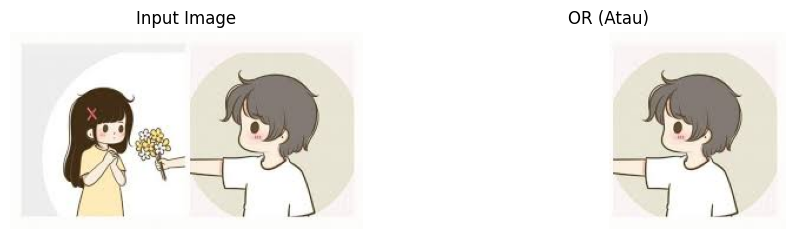

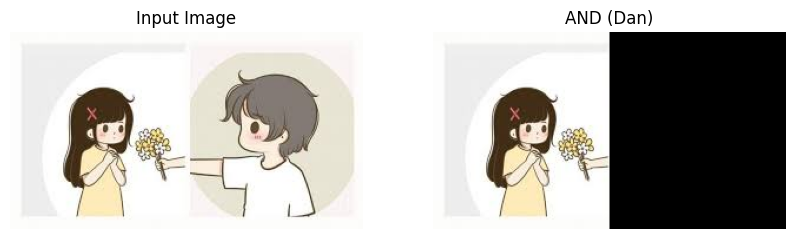

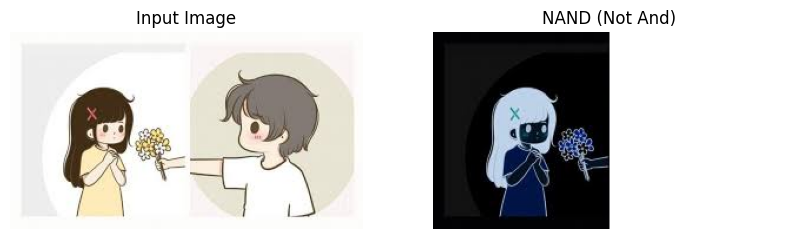

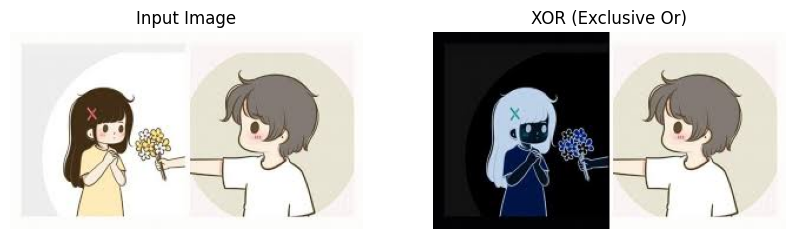

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_images(title1, image1, title2, image2):
    plt.figure(figsize=(10,5))
    plt.subplot(121), plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)), plt.title(title1), plt.axis('off')
    plt.subplot(122), plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)), plt.title(title2), plt.axis('off')
    plt.show()

# Path gambar
image_path = '/content/drive/MyDrive/PCVK_4K/couple2.jpeg'

# Membaca gambar
img = cv2.imread(image_path)

# Cek apakah gambar berhasil dibaca
if img is None:
    print(f"Gambar tidak ditemukan di lokasi: {image_path}")
else:
    # Membuat mask dan melakukan operasi logika
    mask = np.zeros(img.shape, dtype=np.uint8)
    mask[:, :img.shape[1]//2] = 255  # Mask untuk separuh gambar

    not_img = cv2.bitwise_not(img)
    or_img = cv2.bitwise_or(img, mask)
    and_img = cv2.bitwise_and(img, mask)
    nand_img = cv2.bitwise_not(cv2.bitwise_and(img, mask))
    xor_img = cv2.bitwise_xor(img, mask)

    # Menampilkan hasil dengan fungsi show_images
    show_images("Input Image", img, "NOT (komplemen)", not_img)
    show_images("Input Image", img, "OR (Atau)", or_img)
    show_images("Input Image", img, "AND (Dan)", and_img)
    show_images("Input Image", img, "NAND (Not And)", nand_img)
    show_images("Input Image", img, "XOR (Exclusive Or)", xor_img)
